# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load Data

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv"
df = pd.read_csv(url)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


# EDA

In [3]:
# Shape & basic info
print(df.shape)
print(df.info())

# Summary statistics
df.describe()

(32, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mpg      32 non-null     float64
 1   cyl      32 non-null     int64  
 2   disp     32 non-null     float64
 3   hp       32 non-null     int64  
 4   drat     32 non-null     float64
 5   wt       32 non-null     float64
 6   qsec     32 non-null     float64
 7   vs       32 non-null     int64  
 8   am       32 non-null     int64  
 9   gear     32 non-null     int64  
 10  carb     32 non-null     int64  
 11  fast     32 non-null     int64  
 12  cars     32 non-null     object 
 13  carname  32 non-null     object 
dtypes: float64(5), int64(7), object(2)
memory usage: 3.6+ KB
None


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000
mean,4.434770,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125,0.687500
std,0.661137,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152,0.470929
min,3.224903,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000,0.000000
25%,3.927432,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000,0.000000
50%,4.381780,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000,1.000000
75%,4.774935,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000,1.000000
max,5.822371,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000,1.000000


# visaulizing the target distribution

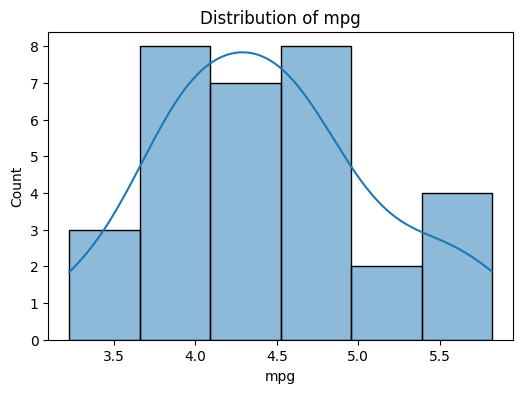

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['mpg'], kde=True)
plt.title("Distribution of mpg")
plt.show()

# Correlation heatmap

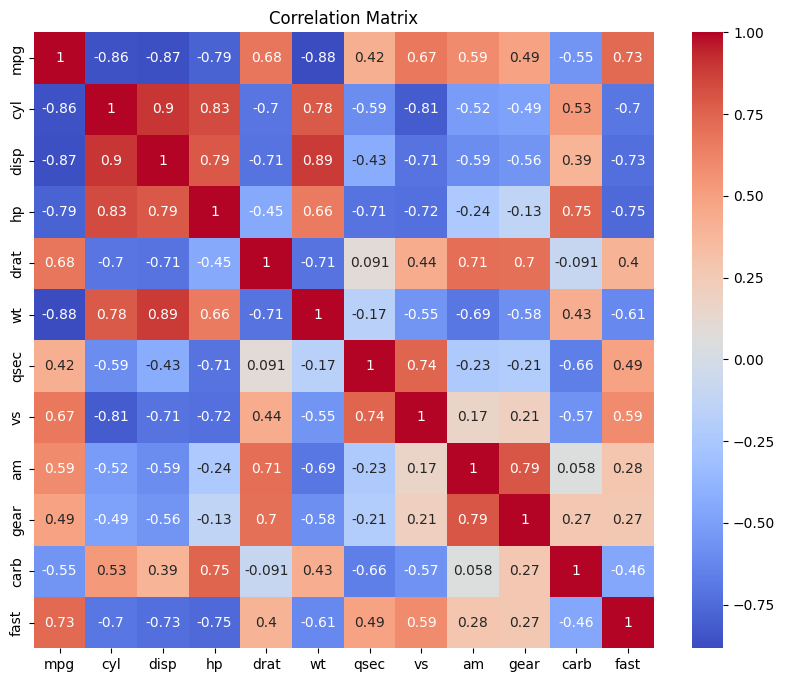

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Preprocessing

In [10]:
# Features & target
X = df.drop(['mpg', 'cars', 'carname'], axis=1)
y = df['mpg']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(25, 11) (7, 11)


# Train Random forest regressor

In [11]:
# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# Evaluate

In [12]:
# Predict
y_pred = rf_model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.21928522913298884
R2 Score: 0.9030156557751803
